# Test robustness to noise of different contrasts

In [2]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '1'

import matplotlib.pyplot as plt
from bsccm import BSCCM
import jax.numpy as np
import numpy as onp
import time
from tqdm import tqdm
from cleanplots import *
from led_array.bsccm_utils import *
from plot_utils import *
from image_utils import *


bsccm = BSCCM('/home/hpinkard_waller/data/BSCCM/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Opening BSCCM
Opened BSCCM


# Compare with equal exposure on the LED array

comparison_to_coherent_exposure_ratio: 0.085


100%|██████████| 20000/20000 [00:00<00:00, 1050993.28it/s]


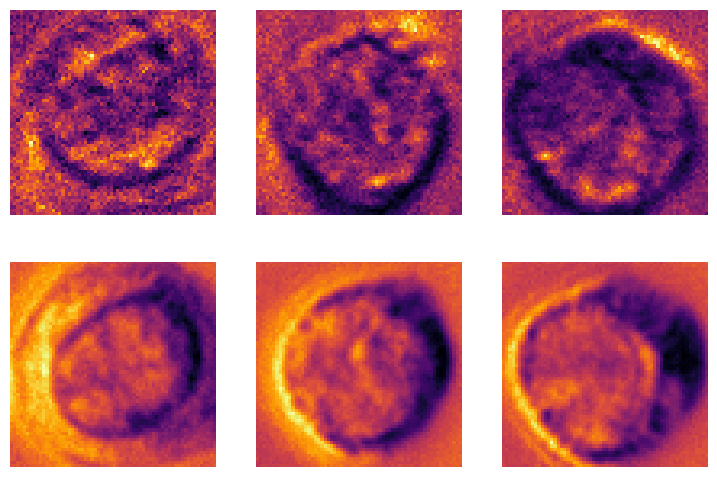

In [3]:
num_images = 10000
patch_size = 50
num_patches = 20000

comparison_contrast = 'DPC_Right'
# comparison_contrast = 'Brightfield'

channels = ['LED119', comparison_contrast]

comparison_to_coherent_exposure_ratio = bsccm.global_metadata['led_array']['exposure_ms'][comparison_contrast] / bsccm.global_metadata['led_array']['exposure_ms']['LED119'] 
print(f'comparison_to_coherent_exposure_ratio: {comparison_to_coherent_exposure_ratio}')

fig, ax = plt.subplots(2, 3, figsize=(9, 6))

def compute_evs_with_rescale(coherent_rescale_factor, do_plot=False):
    eigenvalues = {} 
    for c_index, channel in enumerate(channels):
        photon_images = load_bsccm_images(bsccm, channel, num_images=num_images, edge_crop=32, convert_units_to_photons=True)
        if channel == 'LED119':
            # dpc images already have shot noise
            photon_images = add_shot_noise_to_experimenal_data(photon_images, coherent_rescale_factor)

        patches = extract_patches(photon_images, patch_size=patch_size, num_patches=num_patches)
        eigenvalues[channel] = compute_eigenvalues(patches)

        # plot a few images
        for i in range(3):
            ax[c_index, i].imshow(photon_images[i], cmap='inferno')
            ax[c_index, i].axis('off')
    return eigenvalues

values = compute_evs_with_rescale(comparison_to_coherent_exposure_ratio, do_plot=True)

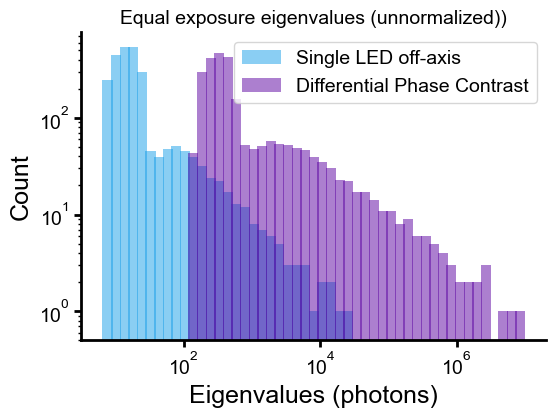

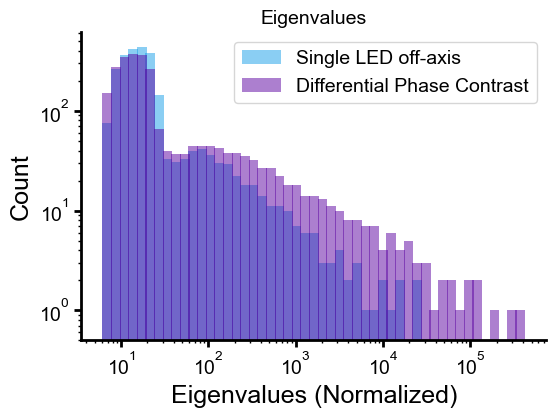

In [9]:
eigenvalue_fig, eigenvalue_ax = plt.subplots(1, 1, figsize=(6, 4))
eigenvalue_hist = OverlayedHistograms(eigenvalue_ax)

for channel in channels:
    eigenvalue_hist.add(values[channel], get_display_channel_names(channel))


eigenvalue_hist.plot()
eigenvalue_ax.set(xlabel='Eigenvalues (photons)', ylabel='Count', title='Equal exposure eigenvalues (unnormalized))')
clear_spines(eigenvalue_ax)
eigenvalue_ax.legend()



def find_alignment_factor(eigenvalues):
    eigenvalue_hist = OverlayedHistograms()

    for channel in channels:
        eigenvalue_hist.add(eigenvalues[channel], get_display_channel_names(channel))

    bins = eigenvalue_hist.generate_bins()
    max_index_c0 = np.argmax(eigenvalue_hist.get_hist_counts(eigenvalues[channels[0]]))
    max_index_c1 = np.argmax(eigenvalue_hist.get_hist_counts(eigenvalues[channels[1]]))
    peak_ratio = bins[max_index_c0] / bins[max_index_c1]
    return peak_ratio


peak_ratio = find_alignment_factor(values)
eigenvalue_fig, eigenvalue_ax = plt.subplots(1, 1, figsize=(6, 4))
eigenvalue_hist = OverlayedHistograms(eigenvalue_ax)

for index, channel in enumerate(channels):
    # normalize so units aren't misleading
    scaled = values[channel] / np.mean(values[channel])
    # align peaks
    scaled = (1 if index == 0 else peak_ratio) * values[channel]
    eigenvalue_hist.add(scaled, get_display_channel_names(channel))

eigenvalue_hist.plot()
eigenvalue_ax.set(xlabel='Eigenvalues (Normalized)', ylabel='Count', title='Eigenvalues')
clear_spines(eigenvalue_ax)
eigenvalue_ax.legend()

# Repeat for brightfield

comparison_to_coherent_exposure_ratio: 0.04


100%|██████████| 20000/20000 [00:00<00:00, 931219.11it/s]


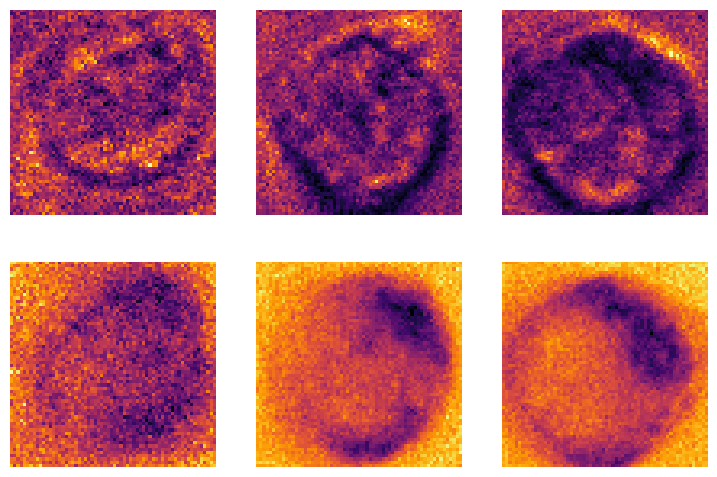

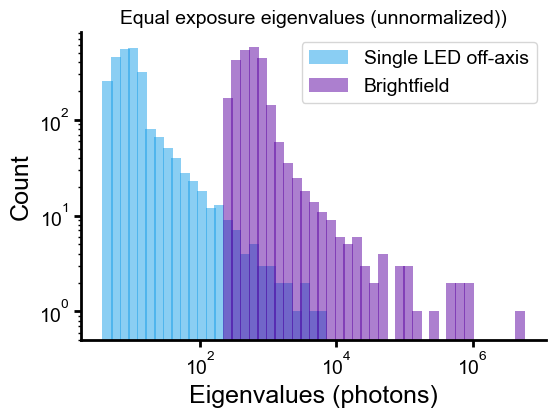

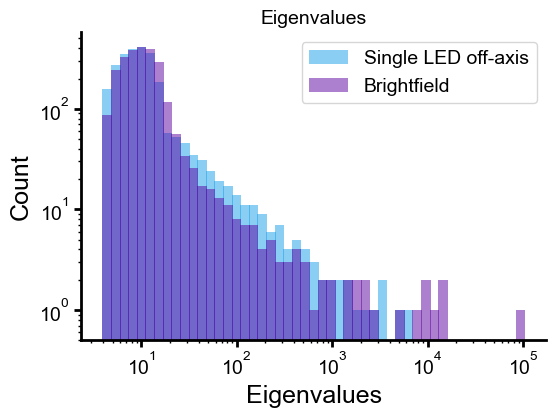

: 

In [10]:
comparison_contrast = 'Brightfield'

channels = ['LED119', comparison_contrast]

comparison_to_coherent_exposure_ratio = bsccm.global_metadata['led_array']['exposure_ms'][comparison_contrast] / bsccm.global_metadata['led_array']['exposure_ms']['LED119'] 
print(f'comparison_to_coherent_exposure_ratio: {comparison_to_coherent_exposure_ratio}')

fig, ax = plt.subplots(2, 3, figsize=(9, 6))

def compute_evs_with_rescale(coherent_rescale_factor, do_plot=False):
    eigenvalues = {} 
    for c_index, channel in enumerate(channels):
        photon_images = load_bsccm_images(bsccm, channel, num_images=num_images, edge_crop=32, convert_units_to_photons=True)
        if channel == 'LED119':
            # dpc images already have shot noise
            photon_images = add_shot_noise_to_experimenal_data(photon_images, coherent_rescale_factor)

        patches = extract_patches(photon_images, patch_size=patch_size, num_patches=num_patches)
        eigenvalues[channel] = compute_eigenvalues(patches)

        # plot a few images
        for i in range(3):
            ax[c_index, i].imshow(photon_images[i], cmap='inferno')
            ax[c_index, i].axis('off')
    return eigenvalues

values = compute_evs_with_rescale(comparison_to_coherent_exposure_ratio, do_plot=True)

eigenvalue_fig, eigenvalue_ax = plt.subplots(1, 1, figsize=(6, 4))
eigenvalue_hist = OverlayedHistograms(eigenvalue_ax)

for channel in channels:
    eigenvalue_hist.add(values[channel], get_display_channel_names(channel))


eigenvalue_hist.plot()
eigenvalue_ax.set(xlabel='Eigenvalues (photons)', ylabel='Count', title='Equal exposure eigenvalues (unnormalized))')
clear_spines(eigenvalue_ax)
eigenvalue_ax.legend()



def find_alignment_factor(eigenvalues):
    eigenvalue_hist = OverlayedHistograms()

    for channel in channels:
        eigenvalue_hist.add(eigenvalues[channel], get_display_channel_names(channel))

    bins = eigenvalue_hist.generate_bins()
    max_index_c0 = np.argmax(eigenvalue_hist.get_hist_counts(eigenvalues[channels[0]]))
    max_index_c1 = np.argmax(eigenvalue_hist.get_hist_counts(eigenvalues[channels[1]]))
    peak_ratio = bins[max_index_c0] / bins[max_index_c1]
    return peak_ratio


peak_ratio = find_alignment_factor(values)
eigenvalue_fig, eigenvalue_ax = plt.subplots(1, 1, figsize=(6, 4))
eigenvalue_hist = OverlayedHistograms(eigenvalue_ax)

for index, channel in enumerate(channels):
    # normalize so units aren't misleading
    scaled = values[channel] / np.mean(values[channel])
    # align peaks
    scaled = (1 if index == 0 else peak_ratio) * values[channel]
    eigenvalue_hist.add(scaled, get_display_channel_names(channel))

eigenvalue_hist.plot()
eigenvalue_ax.set(xlabel='Eigenvalues', ylabel='Count', title='Eigenvalues')
clear_spines(eigenvalue_ax)
eigenvalue_ax.legend()